# Cifar10

Let's move on from Cats & Dogs. We will try to create a CNN that will classify not 2 but 10 different image labels. We get the images from the dataset named [Cifar10](http://www.cs.utoronto.ca/~kriz/cifar.html) 

* Import :
  * Tensorflow
  * Numpy 
  * Matplotlib.pyplot 

In [ ]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

* Using [`tf.keras.datasets`](https://www.tensorflow.org/api_docs/python/tf/keras/datasets) import cifar10 and store the data in `(X_train, y_train), (X_test, y_test)`.

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


* View a random image of your dataset 

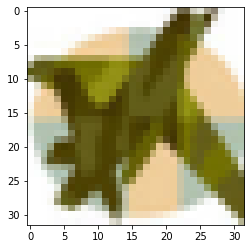

In [ ]:
# Visualize a random picture
plt.imshow(X_train[np.random.randint(0, len(X_train))])

* View a random image of each of your labels in your dataset

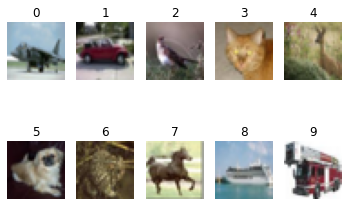

In [ ]:
def visualize_random_img_for_each_target(X_train, y_train, n_rows=2, ncols=5):
    labels = np.unique(y_train)
    fig, axes = plt.subplots(n_rows, ncols)
    for ax, label in zip(axes.flat, labels):
        indices, _ = np.where(y_train == label)
        ax.imshow(X_train[np.random.choice(indices)])
        ax.axis('off')
        ax.set_title(label)

visualize_random_img_for_each_target(X_train, y_train, n_rows=2, ncols=5)

* Divide the image by 255 to normalize them
* Store your training images and labels in a `tf.data.Dataset`.
* Do the same with images and validation labels

In [ ]:
train_ds = tf.data.Dataset.from_tensor_slices((X_train / 255, y_train))
validation_ds = tf.data.Dataset.from_tensor_slices((X_test / 255, y_test))

* Shuffle your dataset via `.shuffle()` and create 16-frame batches via `.batch()`.

In [ ]:
train_batch = train_ds.shuffle(len(X_train)).batch(16)
val_batch = validation_ds.shuffle(len(X_test)).batch(16)

* Look at an example 

In [ ]:
next(iter(train_batch))

(<tf.Tensor: shape=(16, 32, 32, 3), dtype=float64, numpy=
 array([[[[0.18823529, 0.33333333, 0.12941176],
          [0.17254902, 0.32941176, 0.12156863],
          [0.19215686, 0.35686275, 0.14901961],
          ...,
          [0.12941176, 0.28627451, 0.09019608],
          [0.15686275, 0.31372549, 0.11764706],
          [0.18039216, 0.3372549 , 0.1372549 ]],
 
         [[0.19215686, 0.32941176, 0.13333333],
          [0.18039216, 0.32941176, 0.12941176],
          [0.21176471, 0.37254902, 0.16862745],
          ...,
          [0.13333333, 0.29019608, 0.10196078],
          [0.14901961, 0.30588235, 0.12156863],
          [0.20784314, 0.36862745, 0.17647059]],
 
         [[0.21568627, 0.34117647, 0.16078431],
          [0.19215686, 0.32941176, 0.14509804],
          [0.2627451 , 0.41176471, 0.22352941],
          ...,
          [0.1254902 , 0.27843137, 0.09803922],
          [0.19607843, 0.34901961, 0.16862745],
          [0.3372549 , 0.49803922, 0.30980392]],
 
         ...,
 
        

* Create a CNN model with 2D convolutional layers, MaxPool2D layers and Dense  layers

In [ ]:
# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32, 32, 3]),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dropout(0.05),
    tf.keras.layers.Dense(units=16, activation ="relu"),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

* Create a _Learning Rate Schedule_. You can choose to do this with [_ExponentialDecay_](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/schedules/ExponentialDecay) or [other methods](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/schedules)

In [ ]:
# Create a schedule learning rate
initial_learning_rate = 0.001

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=500,
    decay_rate=0.96,
    staircase=True)

* Create a compiler in which you choose : 
  * Your optimizer 
  * Your loss 
  * Your metrics 

In [ ]:
# Create a compiler
model.compile(
    optimizer=tf.keras.optimizers.Adam(lr_schedule),
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=[tf.keras.metrics.sparse_categorical_accuracy]
)

* Run your model on 10 epochs 

In [ ]:
history = model.fit(train_batch, epochs=10)

Epoch 1/10
3125/3125 [==============================] - 43s 3ms/step - loss: 1.8703 - sparse_categorical_accuracy: 0.3002
Epoch 2/10
3125/3125 [==============================] - 11s 3ms/step - loss: 1.2758 - sparse_categorical_accuracy: 0.5385
Epoch 3/10
3125/3125 [==============================] - 11s 3ms/step - loss: 1.0982 - sparse_categorical_accuracy: 0.6066
Epoch 4/10
3125/3125 [==============================] - 11s 3ms/step - loss: 0.9811 - sparse_categorical_accuracy: 0.6490
Epoch 5/10
3125/3125 [==============================] - 11s 3ms/step - loss: 0.8967 - sparse_categorical_accuracy: 0.6794
Epoch 6/10
3125/3125 [==============================] - 11s 3ms/step - loss: 0.8328 - sparse_categorical_accuracy: 0.7016
Epoch 7/10
3125/3125 [==============================] - 11s 3ms/step - loss: 0.7930 - sparse_categorical_accuracy: 0.7161
Epoch 8/10
3125/3125 [==============================] - 11s 3ms/step - loss: 0.7640 - sparse_categorical_accuracy: 0.7284
Epoch 9/10
3125/3125 [==

* Evaluate you model

In [ ]:
model.evaluate(val_batch)

625/625 [==============================] - 2s 2ms/step - loss: 0.8514 - sparse_categorical_accuracy: 0.7137


[0.8514436483383179, 0.713699996471405]

**CAUTION**: our model seems to overfit !!!

* Try to train your model again. This time though: 
  * Add the argument *validation_data = ds_valid*  
  * Take this opportunity to record your training in a variable _history_
  
* What can you conclude about your model?

In [ ]:
history = model.fit(train_batch, epochs=15, validation_data = val_batch)

Epoch 1/15
3125/3125 [==============================] - 14s 4ms/step - loss: 0.7026 - sparse_categorical_accuracy: 0.7502 - val_loss: 0.8411 - val_sparse_categorical_accuracy: 0.7166
Epoch 2/15
3125/3125 [==============================] - 14s 4ms/step - loss: 0.6891 - sparse_categorical_accuracy: 0.7574 - val_loss: 0.8463 - val_sparse_categorical_accuracy: 0.7147
Epoch 3/15
3125/3125 [==============================] - 14s 4ms/step - loss: 0.6774 - sparse_categorical_accuracy: 0.7617 - val_loss: 0.8402 - val_sparse_categorical_accuracy: 0.7167
Epoch 4/15
3125/3125 [==============================] - 13s 4ms/step - loss: 0.6710 - sparse_categorical_accuracy: 0.7636 - val_loss: 0.8352 - val_sparse_categorical_accuracy: 0.7188
Epoch 5/15
3125/3125 [==============================] - 13s 4ms/step - loss: 0.6649 - sparse_categorical_accuracy: 0.7655 - val_loss: 0.8352 - val_sparse_categorical_accuracy: 0.7201
Epoch 6/15
3125/3125 [==============================] - 12s 4ms/step - loss: 0.6614 -

* Look what's in `history.history`

In [ ]:
history.history

{'loss': [0.7025806307792664,
  0.6890574097633362,
  0.6774497628211975,
  0.6710050702095032,
  0.6648869514465332,
  0.6613963842391968,
  0.6583894491195679,
  0.6555817723274231,
  0.6547106504440308,
  0.6525965929031372,
  0.6508331894874573,
  0.6491184830665588,
  0.648931622505188,
  0.6486575603485107,
  0.6473814249038696],
 'sparse_categorical_accuracy': [0.7501599788665771,
  0.7573800086975098,
  0.7616599798202515,
  0.7636200189590454,
  0.765500009059906,
  0.7692599892616272,
  0.7691799998283386,
  0.7697799801826477,
  0.7692000269889832,
  0.7712200284004211,
  0.7702000141143799,
  0.7728599905967712,
  0.7710199952125549,
  0.7709800004959106,
  0.7720400094985962],
 'val_loss': [0.8410953879356384,
  0.8463179469108582,
  0.840244710445404,
  0.8352208137512207,
  0.8351756930351257,
  0.8370846509933472,
  0.8343472480773926,
  0.8343813419342041,
  0.8335210680961609,
  0.8348938226699829,
  0.8343743085861206,
  0.834662675857544,
  0.8333922624588013,
  0.8

* Now watch a graph of how your *loss* evolves as epochs advance 

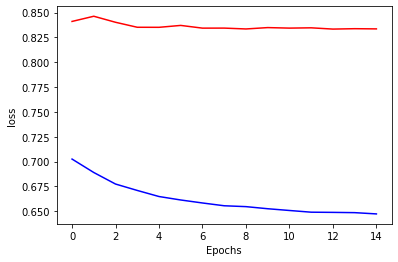

In [ ]:
plt.plot(history.history["loss"], color="b", label="train loss")
plt.plot(history.history["val_loss"], color="r", label="test loss")
plt.ylabel("loss")
plt.xlabel("Epochs")
plt.legend(loc="upper right")
plt.show()

* Do the same with your Accuracy 

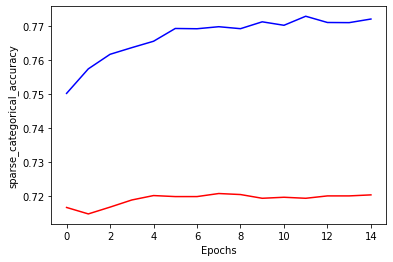

In [ ]:
plt.plot(history.history["sparse_categorical_accuracy"], color="b", label="train accuracy")
plt.plot(history.history["val_sparse_categorical_accuracy"], color="r", label="test accuracy")
plt.ylabel("sparse_categorical_accuracy")
plt.xlabel("Epochs")
plt.legend(loc="upper right")
plt.show()

* One way to deal with overfitting is to do what's called _Data Augmentation_. The principle is to take the images we have in the dataset and repeat them with some minor changes like : 
  * Changing the color, the brightness 
  * Flip the image
  * Crop image 

This technique makes it possible to create new images on which the model can train and therefore perform better! Let's try to see what this could look like on our dataset. 

* Start by using the [`.unbatch()`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#unbatch) function on your training and validation dataset. We'll change the size of the batches later. 

In [ ]:
train_unbatch = train_batch.unbatch()
val_unbatch = val_batch.unbatch()

* Check that you have size tensors $(32, 32, 3)$ by looking at an example in your dataset 

In [ ]:
for image, label in train_unbatch.take(1):
    print(tf.shape(image))

tf.Tensor([32 32  3], shape=(3,), dtype=int32)


* Using the [`repeat()`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#repeat) function, copy your dataset 3 times. 

In [ ]:
augmented = train_unbatch.repeat(3)

* We will now proceed to a phase of data augmentation. Create a `data_aug(image, label)` function which takes an image and a label as arguments. Within this function, try using :
  * `tf.image.random_flip_left_right`
  * `tf.image.random_contrast`
  * `tf.image.random_crop`
  * you can try other things if you want to

In [ ]:
def data_aug(image, label):

    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_contrast(image, 0.5, 1)
    image = tf.image.random_crop(image, [32,32, 3])

    return image, label

* Use the `.map()` function to apply your function on your tf dataset

In [ ]:
augmented = augmented.map(data_aug)

augmented.take(1)

<TakeDataset shapes: ((32, 32, 3), (1,)), types: (tf.float64, tf.uint8)>

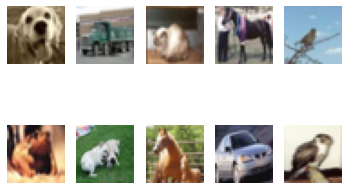

In [ ]:
# look at some examples
fig, axes = plt.subplots(2, 5)

for ax, (img, label) in zip(axes.flat, augmented.take(10)):
    ax.imshow(img)
    ax.axis('off')

* Create batches of 32 images for your validation and training dataset 

In [ ]:
augmented = augmented.shuffle(len(X_train) * 3).batch(32)
val_unbatch = val_unbatch.batch(32)

* Reapply the same model on your new dataset
  * Don't forget to store your training in a `history` variable.

In [ ]:
# Create a compiler
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32, 32, 3]),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dropout(0.05),
    tf.keras.layers.Dense(units=16, activation ="relu"),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(lr_schedule),
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=[tf.keras.metrics.sparse_categorical_accuracy]
)

# Create a schedule learning rate
initial_learning_rate = 0.001

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=500,
    decay_rate=0.96,
    staircase=True)

In [ ]:
history = model.fit(augmented, epochs=15, validation_data = val_batch)

Epoch 1/15
4688/4688 [==============================] - 31s 5ms/step - loss: 1.6271 - sparse_categorical_accuracy: 0.3906 - val_loss: 1.0629 - val_sparse_categorical_accuracy: 0.6254
Epoch 2/15
4688/4688 [==============================] - 24s 4ms/step - loss: 1.0029 - sparse_categorical_accuracy: 0.6413 - val_loss: 0.8808 - val_sparse_categorical_accuracy: 0.6965
Epoch 3/15
4688/4688 [==============================] - 24s 4ms/step - loss: 0.8380 - sparse_categorical_accuracy: 0.7019 - val_loss: 0.8372 - val_sparse_categorical_accuracy: 0.7111
Epoch 4/15
4688/4688 [==============================] - 24s 4ms/step - loss: 0.7376 - sparse_categorical_accuracy: 0.7387 - val_loss: 0.8232 - val_sparse_categorical_accuracy: 0.7237
Epoch 5/15
4688/4688 [==============================] - 24s 5ms/step - loss: 0.6774 - sparse_categorical_accuracy: 0.7607 - val_loss: 0.7955 - val_sparse_categorical_accuracy: 0.7344
Epoch 6/15
4688/4688 [==============================] - 24s 4ms/step - loss: 0.6356 -

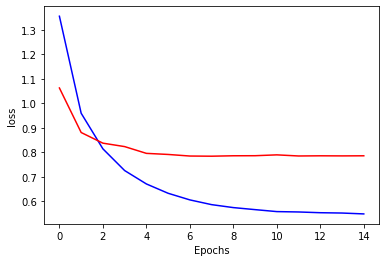

In [ ]:
plt.plot(history.history["loss"], color="b")
plt.plot(history.history["val_loss"], color="r")
plt.ylabel("loss")
plt.xlabel("Epochs")
plt.show()

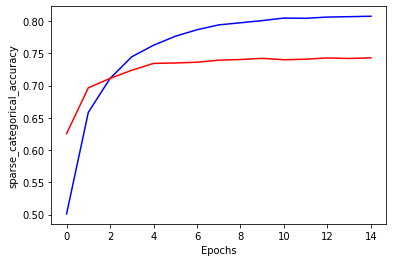

In [ ]:
plt.plot(history.history["sparse_categorical_accuracy"], color="b")
plt.plot(history.history["val_sparse_categorical_accuracy"], color="r")
plt.ylabel("sparse_categorical_accuracy")
plt.xlabel("Epochs")
plt.show()

* Let's try a new technique of regulation: the Dropout. Add a few layers of 20% dropout in your model. 

In [ ]:
# Create a compiler
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32, 32, 3]),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dropout(0.05),
    tf.keras.layers.Dense(units=16, activation ="relu"),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(lr_schedule),
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=[tf.keras.metrics.sparse_categorical_accuracy]
)

# Create a schedule learning rate
initial_learning_rate = 0.001

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=500,
    decay_rate=0.96,
    staircase=True)

* Re-train your model on 15 to 30 epochs 

In [ ]:
history = model.fit(augmented, epochs=15, validation_data = val_batch)

Epoch 1/15
4688/4688 [==============================] - 25s 5ms/step - loss: 1.6850 - sparse_categorical_accuracy: 0.3745 - val_loss: 1.1063 - val_sparse_categorical_accuracy: 0.6065
Epoch 2/15
4688/4688 [==============================] - 24s 5ms/step - loss: 1.1259 - sparse_categorical_accuracy: 0.5975 - val_loss: 0.9406 - val_sparse_categorical_accuracy: 0.6741
Epoch 3/15
4688/4688 [==============================] - 24s 5ms/step - loss: 0.9665 - sparse_categorical_accuracy: 0.6579 - val_loss: 0.8387 - val_sparse_categorical_accuracy: 0.7123
Epoch 4/15
4688/4688 [==============================] - 24s 5ms/step - loss: 0.8932 - sparse_categorical_accuracy: 0.6844 - val_loss: 0.8001 - val_sparse_categorical_accuracy: 0.7222
Epoch 5/15
4688/4688 [==============================] - 24s 5ms/step - loss: 0.8495 - sparse_categorical_accuracy: 0.6989 - val_loss: 0.7786 - val_sparse_categorical_accuracy: 0.7300
Epoch 6/15
4688/4688 [==============================] - 24s 5ms/step - loss: 0.8253 -

* Make the visualizations of loss and accuracy 

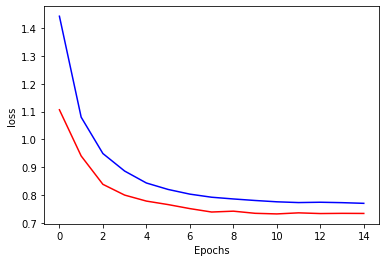

In [ ]:
plt.plot(history.history["loss"], color="b")
plt.plot(history.history["val_loss"], color="r")
plt.ylabel("loss")
plt.xlabel("Epochs")
plt.show()

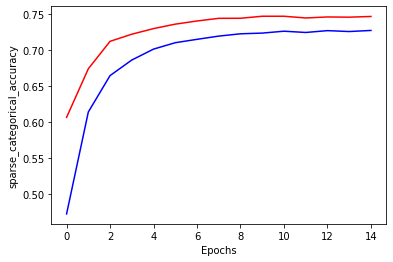

In [ ]:
plt.plot(history.history["sparse_categorical_accuracy"], color="b")
plt.plot(history.history["val_sparse_categorical_accuracy"], color="r")
plt.ylabel("sparse_categorical_accuracy")
plt.xlabel("Epochs")
plt.show()

---> Not bad, we're getting some decent scores!